# Data Cleaning and EDA (Exploratory Data Analysis)


## Data set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Attribute Information:

#### Independent Variables (Features):

#### Bank client data
1. Age (numeric)
2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign
8. Contact: contact communication type (categorical:
'cellular','telephone')
9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
10. Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
11. Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

#### Other attributes
12. Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
13. Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
14. Previous: number of contacts performed before this campaign and for
this client (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

#### Social and economic context attributes
16. Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
17. Cons.price.idx: consumer price index - monthly indicator (numeric)
18. Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
19. Euribor3m: euribor 3 month rate - daily indicator (numeric)
20. Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Summary: 
-> There are 20 Independent Variables (Features) and 1 Dependent Variable (Target)

#### Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [2]:
bank = pd.read_csv("bank-additional-full.csv", sep = ';')

Setelah membaca variable description dataset ini, saya membuat keputusan utk membuang atau men-drop variable duration,
dikarenakan feature ini sangat mempengaruhi target variable kita di model ini (e.g., if duration=0 then y='no').
Dan duration ini didapat setelah kita menelpon target client, jika belom ada penelponan, feature ini tidak ada gunanya. 
Maka utk membuat model yg se-realistic mungkin, sesuai dengan pernyataan di description, sebaiknya di drop saja.

In [3]:
bank.drop("duration", axis = 1, inplace = True)

In [4]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
bank.shape

# dataset ini mempunyai sekarang mempunyai 20 columns dan 41188 rows
# data rows disini merepresentasikan user / customer data

(41188, 20)

In [7]:
bank.info()

# disini bisa dilihat bahwa tidak ada missing values 
# tetapi adanya data yg valuenya "unknown" dan "nonexistent", bisa kita anggap sebagai data yg 
# bisa di categorikan sebagai pengganti missing value kita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
bank.isnull().any()

# tidak ada missing value

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [9]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
bankDesc = []
for item in bank.columns:
    bankDesc.append([item, bank[item].dtypes, bank[item].isna().sum(), round((bank[item].isna().sum() / len(bank)) * 100, 2), bank[item].nunique()
                  , bank[item].drop_duplicates().sample(2).values])
    
pd.DataFrame(bankDesc, columns = ["Data Features", "Data Type", "null", "nullPct", "unique", "uniqueSample"])

# ini simple quick describe dari dataset kita

,Data Features,Data Type,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[77, 98]"
1,job,object,0,0.0,12,"[entrepreneur, services]"
2,marital,object,0,0.0,4,"[married, unknown]"
3,education,object,0,0.0,8,"[high.school, university.degree]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[yes, no]"
6,loan,object,0,0.0,3,"[no, unknown]"
7,contact,object,0,0.0,2,"[cellular, telephone]"
8,month,object,0,0.0,10,"[may, nov]"
9,day_of_week,object,0,0.0,5,"[thu, fri]"


In [11]:
bank.describe()

# bisa dilihat bahwa terdapat outlier di columns "campaign" dan "previous"
# dimana jarak antara Q3 (75%) dan max cukup jauh perbedaannya

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA

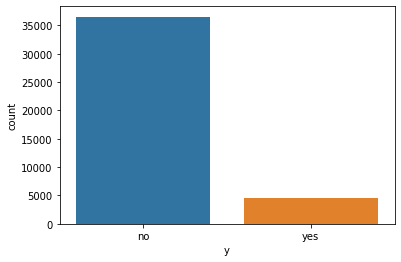

In [12]:
sns.countplot("y", data = bank)

# kita bisa melihat bahwa datanya highly imbalance karena lebih banyak jauh yg "no" daripada "yes"

In [13]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [14]:
depo = []

for item in bank["y"].unique():
    if item == "no":
        depo.append(round((len(bank[bank["y"] == item]) / len(bank["y"])) * 100, 2))
    else:
        depo.append(round((len(bank[bank["y"] == item]) / len(bank["y"])) * 100, 2))

depoframe = pd.DataFrame({"Open_term_deposit" : depo}, index = ["no", "yes"])
depoframe
        

,Open_term_deposit
no,88.73
yes,11.27


Karena data class target kita imbalance, maka kita bisa mencoba melakukan oversampling di tahap modelling nanti

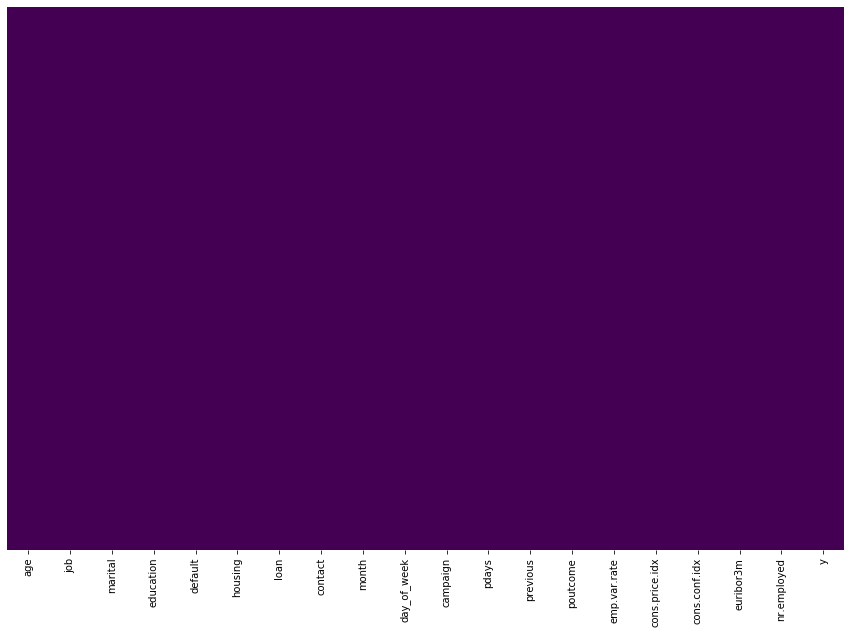

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
sns.heatmap(bank.isna(),yticklabels=False,cbar=False,cmap='viridis')

# ini hanya visualisasi missing values saja

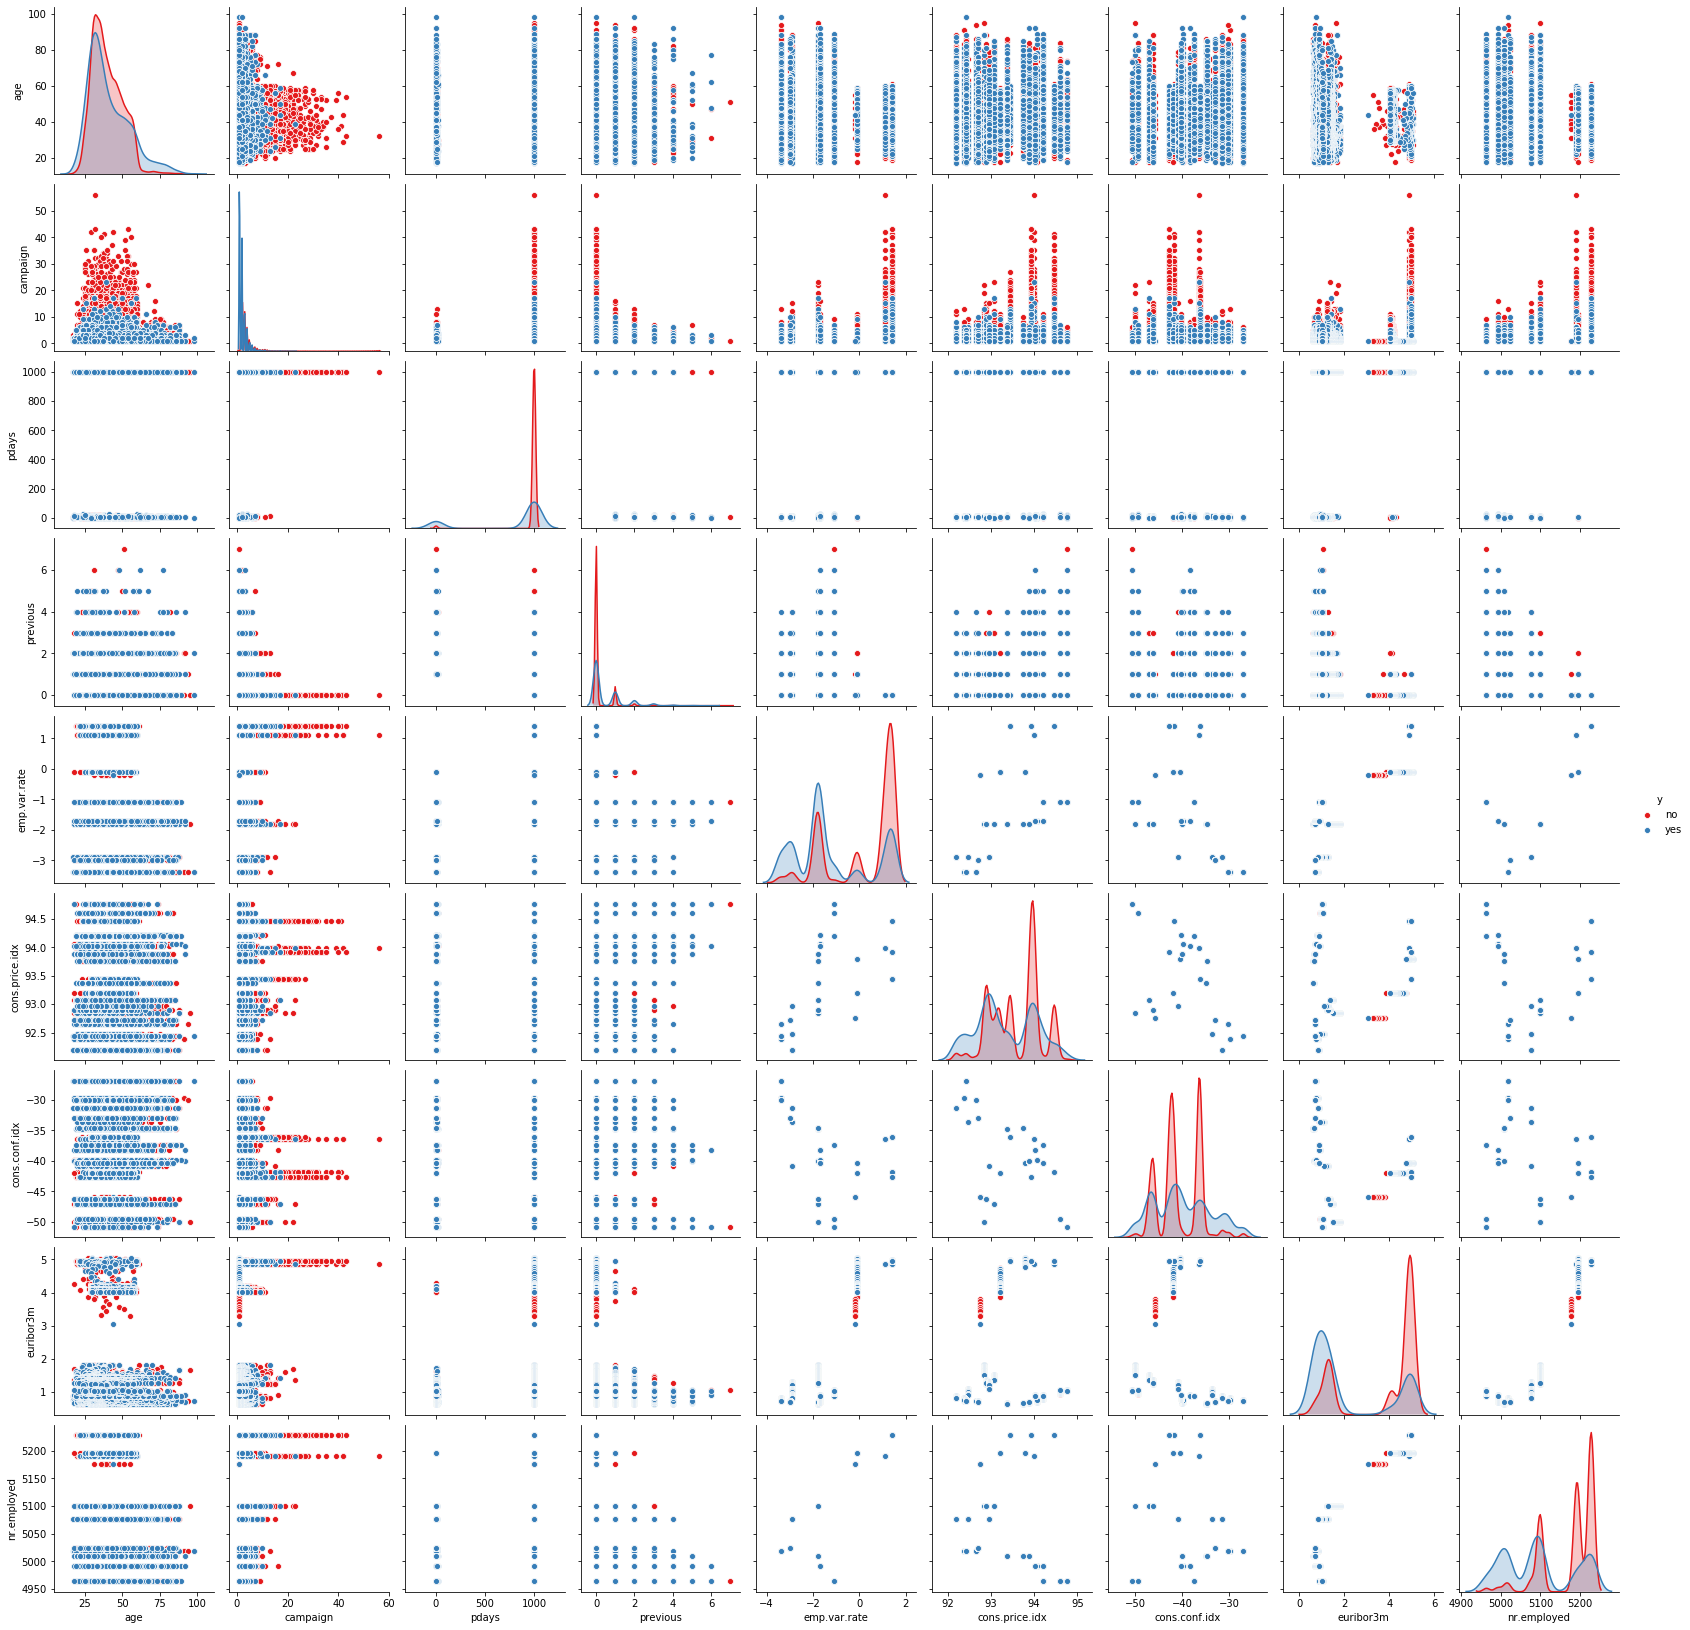

In [16]:
sns.pairplot(bank, hue = "y", palette = "Set1")

# rata" client bank, tidak subscribed utk bank term deposit

## Numerical Features / Independent Variables

In [17]:
numcol = bank.select_dtypes(exclude = object).columns
print(numcol)
len(numcol)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


9

In [18]:
desc_age = bank["age"].describe()
desc_campaign = bank["campaign"].describe()
desc_pdays = bank["pdays"].describe()
desc_previous = bank["previous"].describe()
desc_emp = bank["emp.var.rate"].describe()
desc_consprice = bank["cons.price.idx"].describe()
desc_consconf = bank["cons.conf.idx"].describe()
desc_eur = bank["euribor3m"].describe()
desc_nr = bank["nr.employed"].describe()

desc_list = [desc_age, desc_campaign, desc_pdays, desc_previous, desc_emp, desc_consprice, 
            desc_consconf, desc_eur, desc_nr]

In [19]:
# function utk cek outlier

def outlier_check(col,x):   
    Q1 = col["25%"]
    Q3 = col["75%"]
## Formula utk IQR method
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
## Formula utk outliers
    outliers = bank[(bank[x] > upper_limit) | (bank[x] < lower_limit)].value_counts().sum()
    original = bank[x].value_counts().sum()
    percentage_outliers = outliers / original * 100
    return percentage_outliers

In [20]:
# making a quick table percentage of outliers from data set

outlier = []
outlier_word = []
for i, j in zip(desc_list, numcol):
    if outlier_check(i, j) == 0:
        outlier_word.append("No Outliers")
        outlier.append(outlier_check(i, j))
    else:
        outlier_word.append("Have Outliers")
        outlier.append(outlier_check(i, j))
        
outlier_table = pd.DataFrame({"Outliers" : outlier, "Meaning" : outlier_word}, index = numcol)

outlier_table


,Outliers,Meaning
age,1.138681,Have Outliers
campaign,5.841507,Have Outliers
pdays,3.678256,Have Outliers
previous,13.656890,Have Outliers
emp.var.rate,0.000000,No Outliers
cons.price.idx,0.000000,No Outliers
cons.conf.idx,1.085268,Have Outliers
euribor3m,0.000000,No Outliers
nr.employed,0.000000,No Outliers


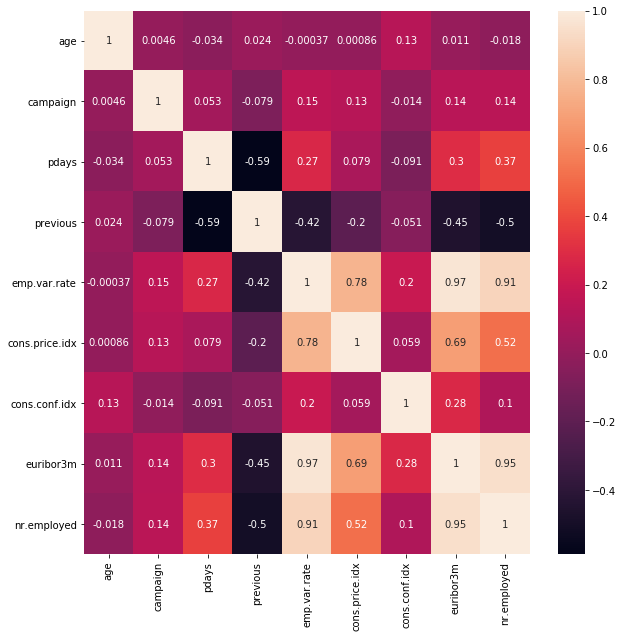

In [21]:
# CORRELATION NUMERICAL FEATURES

figure(figsize = (10,10))
sns.heatmap(bank.corr(), annot = True)

# ada beberapa features dari social and economic context attributes yang memiliki correlation yang tinggi 

Yang punya multicorrelation kebanyakan yang berhubungan dengan feature euribor3m, nr.employed, emp.var.rate,
cons.price.idx
4 features ini yg disebut data social and economic context attributes, memiliki correlation yg tinggi satu antar 
lainnya.

## Categorical Features / Independent Variables

In [22]:
catcol = bank.select_dtypes(exclude = np.number).columns
print(catcol)
len(catcol)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


11

### Memastikan lagi di data column categorical yg == "unknown" & "non-existent"

In [23]:
unknownData = []
nonexistentData = []
cleanData = []

for col in catcol:
    if len(bank[bank[col] == "unknown"]) != 0:
        unknownData.append(col)
    elif len(bank[bank[col] == "nonexistent"]) != 0:
        nonexistentData.append(col)
    else:
        cleanData.append(col)
    
print(unknownData)
print(nonexistentData)
print(cleanData)

['job', 'marital', 'education', 'default', 'housing', 'loan']
['poutcome']
['contact', 'month', 'day_of_week', 'y']


Membuat fungsi utk mencari count utk semua unknown data di column unknownData dan persentase dari seluruh data tsb

In [24]:
def find_unknown(x): # x itu dataframe
    
    unk_count = []
    unk_percen = []
    
    for col in unknownData:
        unk_count.append(len(x[x[col] == "unknown"]))
        unk_percen.append((len(x[x[col] == "unknown"]) / len(x[col])) * 100)
    
    unknown_table = pd.DataFrame({"Unknown_count" : unk_count, "Unknown_percent" : unk_percen}, index = unknownData)
    
    return unknown_table

find_unknown(bank)

,Unknown_count,Unknown_percent
job,330,0.801204
marital,80,0.194231
education,1731,4.202680
default,8597,20.872584
housing,990,2.403613
loan,990,2.403613


Membuat fungsi utk mencari count utk semua nonexistent data di column nonexistentData

In [25]:
def find_non(x): # x itu dataframe
    
    non_count = []
    non_percent = []
    
    for col in nonexistentData:
        non_count.append(len(x[x[col] == "nonexistent"]))
        non_percent.append((len(x[x[col] == "nonexistent"]) / len(x[col])) * 100)
    
    nonexistent_table = pd.DataFrame({"Nonexistent_count" : non_count, "Nonexistent_percent" : non_percent}, index = nonexistentData)
    
    return nonexistent_table

find_non(bank)


,Nonexistent_count,Nonexistent_percent
poutcome,35563,86.34311


In [26]:
# utk data unknown

replace_data = []
keep_data = []

for i in unknownData:
    if (len(bank[bank[i] == "unknown"]) / len(bank[i])) <= 0.05:
                 replace_data.append(i)
    else:
                 keep_data.append(i)

for j in nonexistentData:
    if (len(bank[bank[j] == "nonexistent"]) / len(bank[j])) <= 0.05:
                 replace_data.append(j)
    else:
                 keep_data.append(j)
           

print("Column ini akan kita replace = {}".format(replace_data))
print("Column ini akan kita keep = {}".format(keep_data))
                
        

Column ini akan kita replace = ['job', 'marital', 'education', 'housing', 'loan']
Column ini akan kita keep = ['default', 'poutcome']


1). Dengan menggunakan asumsi utk data unknown & nonexistent sebagai missing value.
Jadi kalo missing value ini jumlahnya <= 5%, maka akan saya replace valuenya dengan mode di column tsb, 
tetapi jika > 5%, maka akan saya keep, karena memang mungkin memiliki informasi yg berkaitan dengan target.

2). Kenapa mode? karena yang saya tahu, "Mode value is robust to Outliers where as Mean and Median values are sensitive to outliers." Yang dimana outliers disini itu missing values (i.e unknown dan nonexistent).

3). Maka dari itu, utk features "job", "marital", "education", "housing" dan "loan", akan saya replace valuenya dengan mode data tsb. Utk Feature "Default" dan "poutcome" akan saya tetap keep karna % missing valuenya lumayan besar (i.e 20% dan 86%), bisa kita asumsi ini bukan sebuah missing value lagi, melainkan mungkin emang client memilih utk tidak menjawab atau mengisi N/A utk column ini. Akan saya analisa lebih lanjut dibawah nanti.

In [27]:
## formula utk mencari correlasi antar categorical variables

#Correlation measurement untuk data kategorikal dan kategorical
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#Correlation measurement untuk data kategorikal dan data numerikal
def correlation_ratio(categories, measurement):
    fcat,_ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurement,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

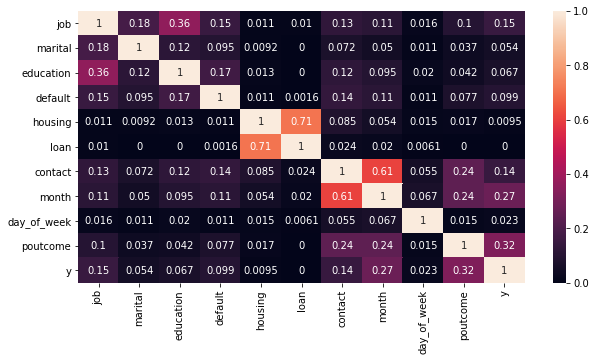

In [28]:
## Correlation Categorical Features

corr_Cat = []

for i in catcol:
    inter = []
    for j in catcol:
        inter.append(cramers_v(bank[i], bank[j]))
    corr_Cat.append(inter)
    
cat_cramers = pd.DataFrame(corr_Cat, index = catcol, columns = catcol)
plt.figure(figsize = (10,5))
sns.heatmap(cat_cramers,annot = True)

Feature Loan dan Housing memiliki correlation yg sama 1 dengan yang lain, begitu juga dengan Feature contact dan month.

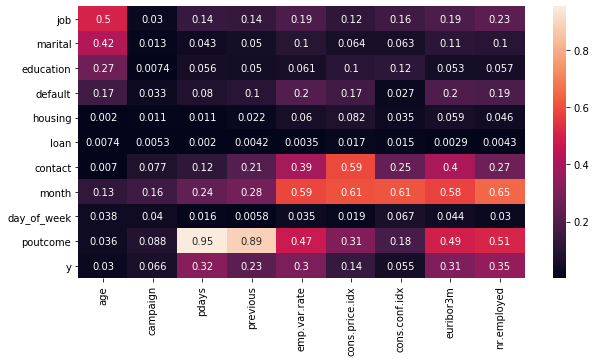

In [29]:
## Numerical and Categorical CORRELATION

corrNumCat = []

for i in catcol:
    inter2 = []
    for j in numcol:
        inter2.append(correlation_ratio(bank[i],bank[j]))
    corrNumCat.append(inter2)

numcat_cramers = pd.DataFrame(corrNumCat, index = catcol, columns = numcol)
plt.figure(figsize = (10,5))
sns.heatmap(numcat_cramers,annot = True)

Feature poutcome dengan pdays dan previous memiliki correlationnya yg tinggi, kita akan eksplorasi lebih dibawah

### kita akan memulai eksplorasi data variables di bagian Bank Client Data dahulu

### AGE

Text(0.5, 1.0, 'Age Count Distribution')

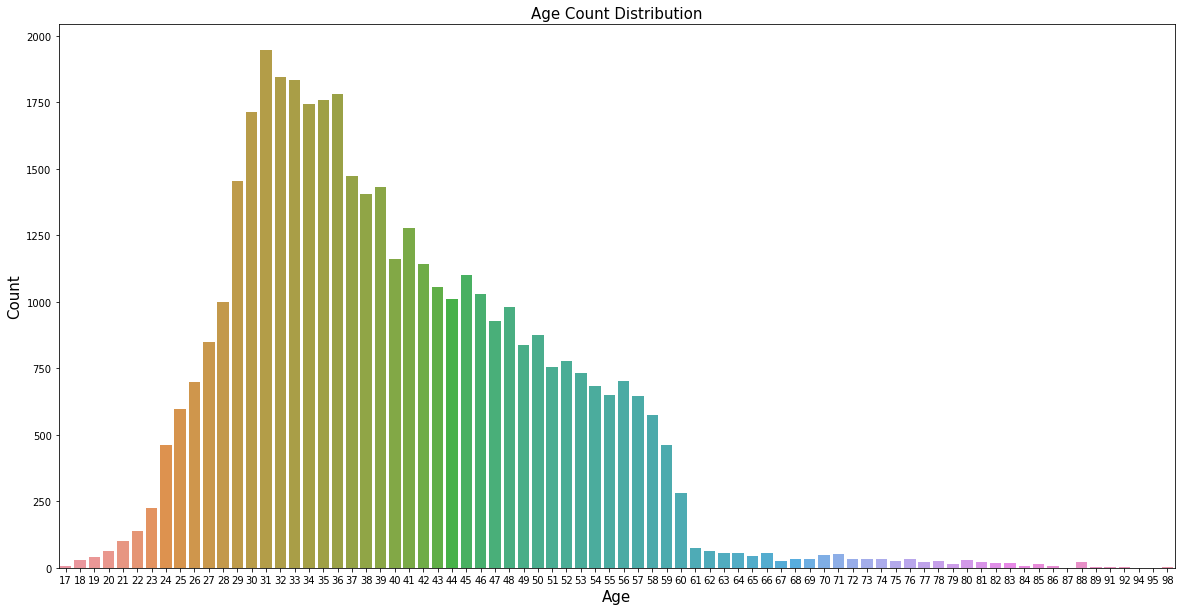

In [30]:
# Age Distribution 

figure(figsize = (20,10))
sns.countplot(x = 'age', data = bank)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)

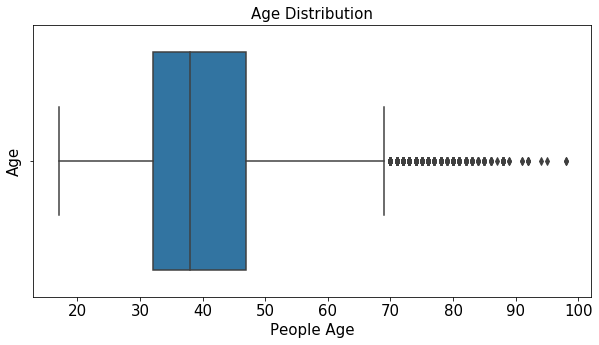

In [31]:
# Age Boxplot

figure(figsize = (10,5))
sns.boxplot(x = 'age', data = bank, orient = 'h')
plt.xlabel('People Age', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=15)
plt.tick_params(labelsize=15)

Rata-rata client bank umurnya kebanyakan dari 30 sampai hampir 50, masih bisa dibilang muda
tapi bisa dilihat juga ada beberapa yg agenya termasuk data outlier (kira" kalau dari chart umur 69 keatas)

In [32]:
bank["age"].describe()
# client bank range umurny dari 17 - 98

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [33]:
bank["age"].nunique()
# ada 78 total variance umur

78

In [34]:
bank["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [35]:
# membuat fungsi age grouping utk mempermudah analisa dengan reference ke boxplot age

def age_group(data):
    if data <= 32: # dibawah Q1
        return "<32" 
    elif data > 32 and data <= 47: # antara Q1 an Q3
        return "33-47" 
    elif data > 47 and data <= 70: # antara Q3 dan upper limit
        return "48-70"
    else: # outliers
        return ">70"
    

In [36]:
aging = bank["age"].apply(age_group)
aging.value_counts()

33-47    20139
<32      11176
48-70     9451
>70        422
Name: age, dtype: int64

In [37]:
age_class = pd.concat([aging, bank["y"]], axis = 1)
age_class.head()

,age,y
0,48-70,no
1,48-70,no
2,33-47,no
3,33-47,no
4,48-70,no


In [38]:
# kita liat perbandingan client yang open term deposit dengan umur mereka

age_unique = aging.unique()
age_deposit = []
age_deposit_percent = []

for j in age_unique:
    age_deposit.append(len(age_class[(age_class["y"] == "yes") & (age_class["age"] == j)]))
    age_deposit_percent.append((len(age_class[(age_class["y"] == "yes") & (age_class["age"] == j)]) / len(age_class[age_class["age"] == j])) * 100)

agedep = pd.DataFrame({"Open_deposit" : age_deposit, "Open_deposit_percent" : age_deposit_percent}, index = [age_unique])
agedep.sort_values(ascending = False, by = "Open_deposit_percent")

,Open_deposit,Open_deposit_percent
>70,202,47.867299
<32,1528,13.672155
48-70,1119,11.840017
33-47,1791,8.893192


Dari data client, client bank yang mempunyai percentase tertinggi utk membuka term deposit ternyata umurnya yg 
diatas 70 tahun, lalu diikuti oleh client yg umurnya dibawah 32

## JOB

Text(0.5, 1.0, 'Job Count Distribution')

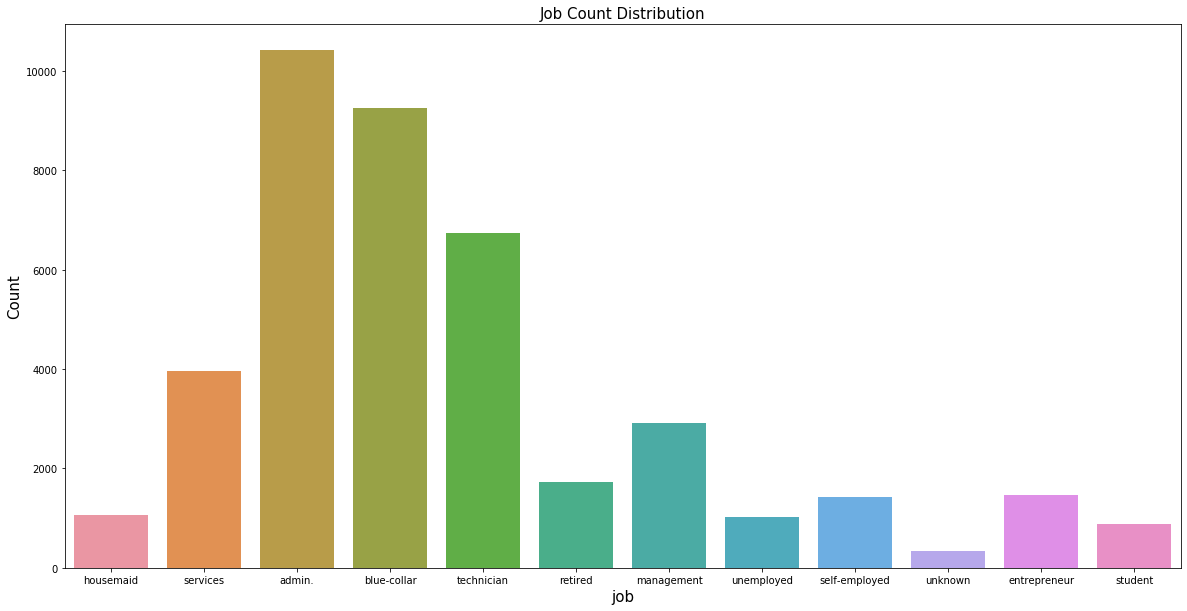

In [39]:
figure(figsize = (20,10))
sns.countplot(x = 'job', data = bank)
plt.xlabel('job', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Count Distribution', fontsize=15)

Client bank kebanyakan memiliki profesi atau job sebagai admin lalu blue-collar dan technician

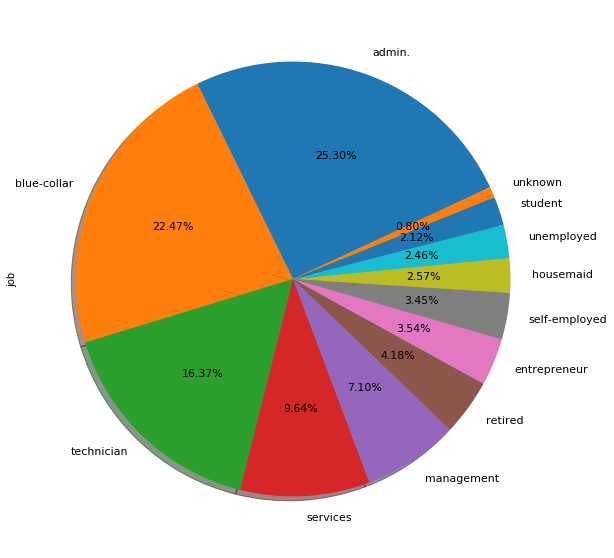

In [40]:
figure(figsize = (20,10))
bank["job"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, 
                                            fontsize=11, startangle=25)


Ada sebanyak (25.30% + 22.47% + 16.37%) = 64.14% dari seluruh client di data set, memliki pekerjaan sebagai
admin, blue-collar dan technician

In [41]:
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [42]:
# membuat fungsi perbandingan client yang open term deposit dengan features variables

def open_depo(x, y):
    
    data_unique = x[y].unique()
    data_deposit = []
    data_deposit_percent = []

    for j in data_unique:
        data_deposit.append(len(x[(x["y"] == "yes") & (x[y] == j)]))
        data_deposit_percent.append((len(x[(x["y"] == "yes") & (x[y] == j)]) / len(x[x[y] == j])) * 100)

    dep = pd.DataFrame({"Open_deposit" : data_deposit, "Open_deposit_percent" : data_deposit_percent}, index = [data_unique])
    
    return dep.sort_values(ascending = False, by = "Open_deposit_percent")
    
    

In [43]:
# kita liat perbandingan client yang open term deposit dengan status pekerjaan mereka

open_depo(bank, "job")

,Open_deposit,Open_deposit_percent
student,275,31.428571
retired,434,25.232558
unemployed,144,14.201183
admin.,1352,12.972558
management,328,11.217510
unknown,37,11.212121
technician,730,10.826042
self-employed,149,10.485574
housemaid,106,10.000000
entrepreneur,124,8.516484


Client bank yg mempunyai status atau pekerjaan sebagai student dan retired, merupakan client bank
yg mempunya persentase tertinggi utk membuka term deposit.

### Me-replace unknown dengan mode di Job

In [44]:
# membuat formula utk me-replace nilai "unknown" di column job tersebut

def job_replace(x):
    if x == "unknown":
        return "admin."
    else:
        return x
    
bank["job"] = bank["job"].apply(job_replace)


In [45]:
bank["job"].value_counts()
# sudah dihapus unknown dan direplace oleh admin

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [46]:
open_depo(bank, "job")

,Open_deposit,Open_deposit_percent
student,275,31.428571
retired,434,25.232558
unemployed,144,14.201183
admin.,1389,12.918527
management,328,11.217510
technician,730,10.826042
self-employed,149,10.485574
housemaid,106,10.000000
entrepreneur,124,8.516484
services,323,8.138070


## AGE and JOB

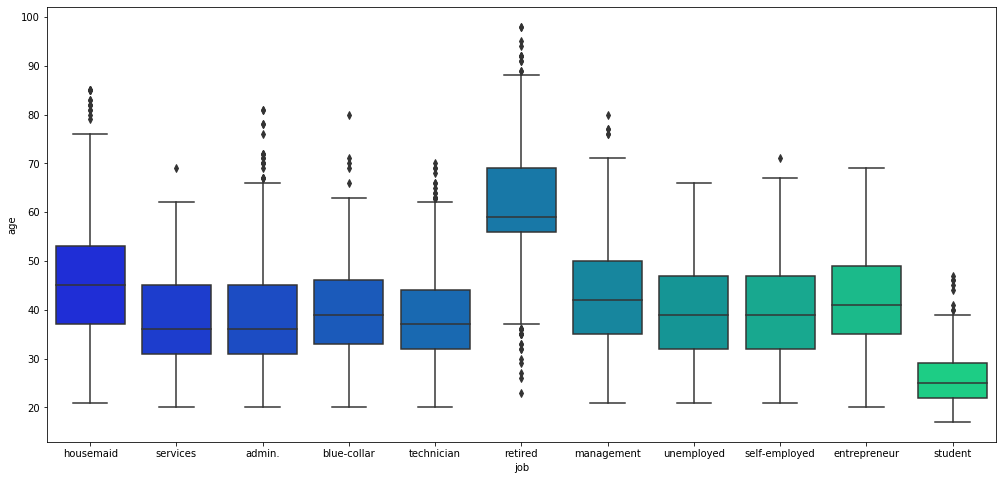

In [47]:
plt.figure(figsize=(17, 8))
sns.boxplot(x = 'job',y = 'age',data = bank, palette = 'winter')

Dari boxplot, kita bisa liat relasi umur dan job client, berdasarkan analisa persentase pembukaan term deposit diatas, 
bisa kita simpulkan bahwa client yg potential itu adalah yg berstatus sebagai student (range umur kebanyakan dibawah 30)
dan retired (range umur diatas 55)

NOTE: kita bisa merekomendasi bank dengan 2 cara:

    1). Mentargetkan client yg berstatus masih student atau sudah retired
    2). Mentargetkan client yg umurnya masih dibawah 32 tahun atau diatas 70 tahun

## MARITAL

Text(0.5, 1.0, 'Marital Count Distribution')

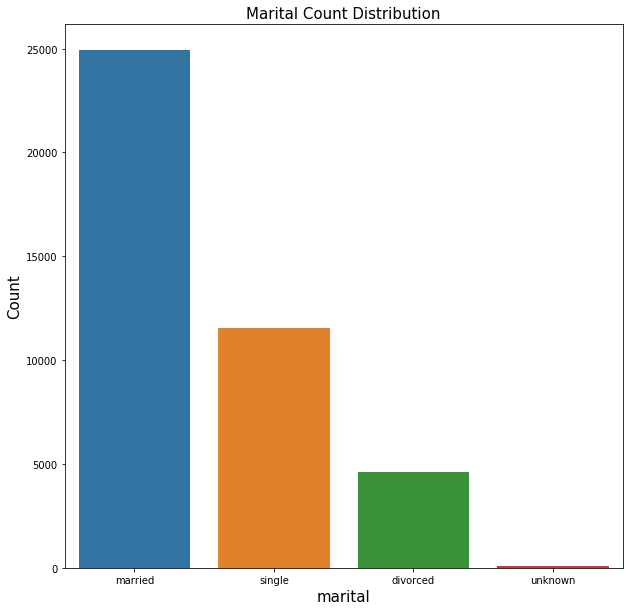

In [48]:
figure(figsize = (10,10))
sns.countplot(x = 'marital', data = bank)
plt.xlabel('marital', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Count Distribution', fontsize=15)

Lebih dari setengah client di bank adalah yang sudah married

In [49]:
bank["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [50]:
# kita liat perbandingan client yang open term deposit dengan status perkawinan mereka

open_depo(bank, "marital")


,Open_deposit,Open_deposit_percent
unknown,12,15.000000
single,1620,14.004149
divorced,476,10.320902
married,2532,10.157253


In [51]:
# membuat formula utk me-replace nilai "unknown" di column marital tersebut

def marital_replace(x):
    if x == "unknown":
        return "married"
    else:
        return x
    
bank["marital"] = bank["marital"].apply(marital_replace)


In [52]:
bank["marital"].value_counts()
# sudah di hapus unknown dan direplace oleh married

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [53]:
open_depo(bank, "marital")

,Open_deposit,Open_deposit_percent
single,1620,14.004149
divorced,476,10.320902
married,2544,10.172745


Ternyata client bank yg statusnya single, berpotensi memiliki percentase lebih besar utk membuka term deposit di bank.

Mungkin ini karena, mereka ingin menginvest uang mereka utk masa depan mereka sebelom mereka menikah seperti di boxplot dibawah, yang umurnya masih dibawah 40 tahun (masih muda) atau mereka adalah orang yang ingin mempunyai financial freedom dengan mengandalkan passive income dari term deposit, dan ini masuk akal juga karena mereka statusnya single jadi seharusnya beban keuangan mereka tidak terlalu besar biasanya seperti utk yg umurnya sudah diatas 50 tahun.

NOTE: kita bisa merekomendasikan bank, utk lebih mentarget client yang belom menikah (single) atau yang umurnya sudah diatas 50 tahun, karena mereka mungkin lebih memikirkan dana pensiun.

## AGE and Marital

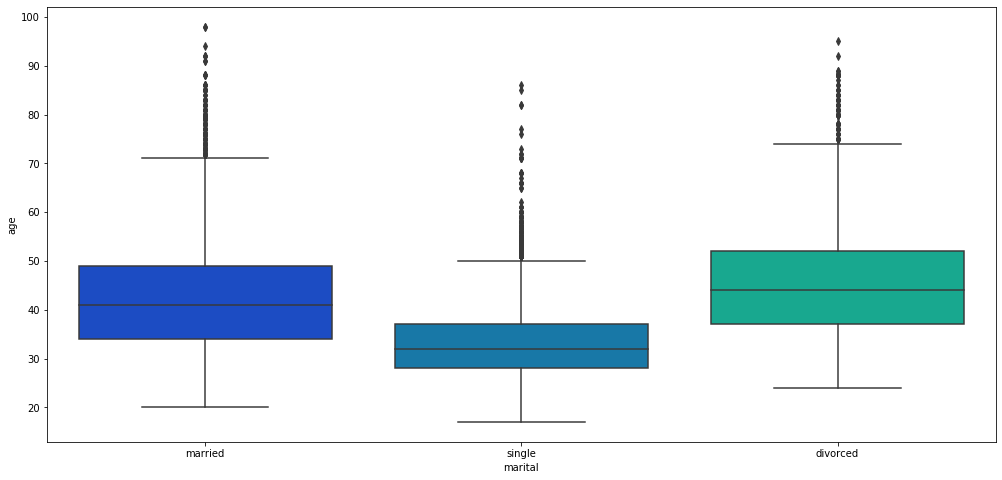

In [54]:
plt.figure(figsize=(17, 8))
sns.boxplot(x = 'marital',y = 'age',data = bank, palette = 'winter')

## Education

Text(0.5, 1.0, 'Education Count Distribution')

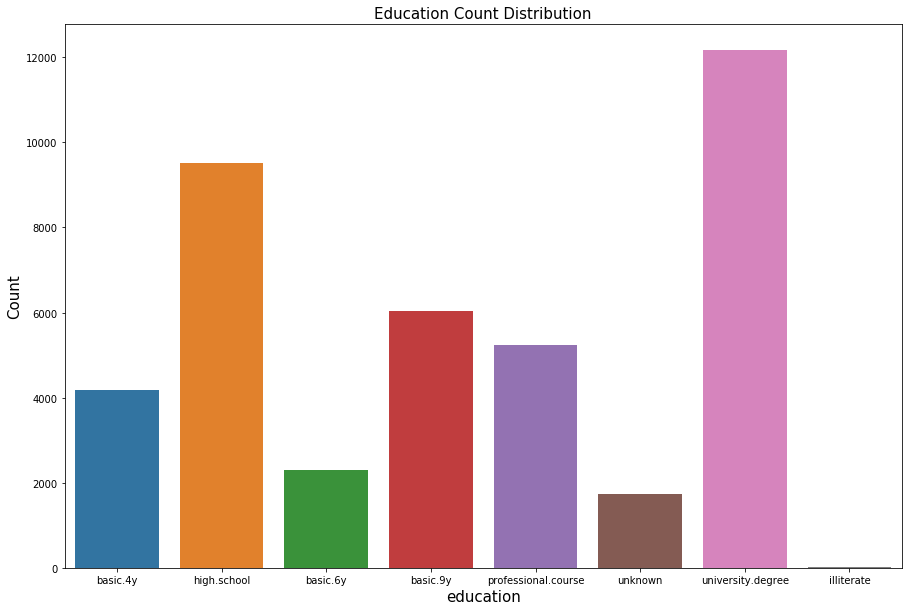

In [55]:
figure(figsize = (15,10))
sns.countplot(x = 'education', data = bank)
plt.xlabel('education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Count Distribution', fontsize=15)

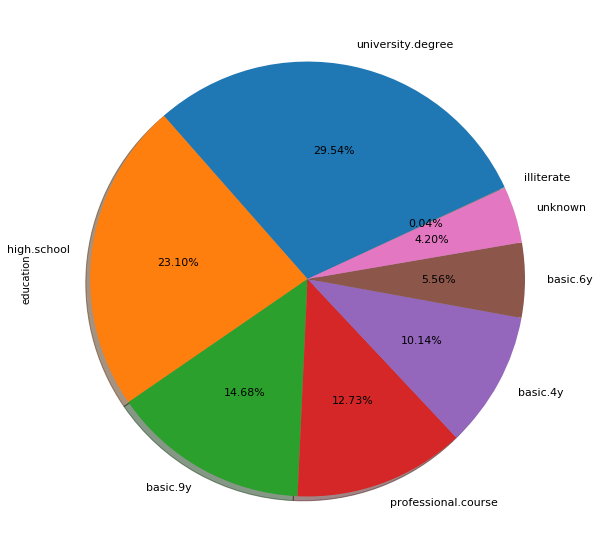

In [56]:
figure(figsize = (20,10))
bank["education"].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, 
                                            fontsize=11, startangle=25)


In [57]:
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [58]:
# kita liat perbandingan client yang open term deposit dengan education mereka

open_depo(bank, "education")

,Open_deposit,Open_deposit_percent
illiterate,4,22.222222
unknown,251,14.500289
university.degree,1670,13.724523
professional.course,595,11.348465
high.school,1031,10.835523
basic.4y,428,10.249042
basic.6y,188,8.202443
basic.9y,473,7.824648


In [59]:
# membuat formula utk me-replace nilai "unknown" di column education tersebut

def edu_replace(x):
    if x == "unknown":
        return "university.degree"
    else:
        return x
    
bank["education"] = bank["education"].apply(edu_replace)


In [60]:
bank["education"].value_counts()
# sudah di hapus unknown dan di replace oleh university.degree

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [61]:
open_depo(bank, "education")

,Open_deposit,Open_deposit_percent
illiterate,4,22.222222
university.degree,1921,13.821138
professional.course,595,11.348465
high.school,1031,10.835523
basic.4y,428,10.249042
basic.6y,188,8.202443
basic.9y,473,7.824648


NOTE: Kita bisa merekomendasikan bank, utk lebih mentarget orang yang mempunyai education sperti university.degree atau professional.course
    tapi, tidak bisa dipungkiri bahwa orang yang illiterate adalah yang mempunyai persentase tertinggi utk membuka term deposit.
    Jadi kemungkinan orang yang illiterate mempunyai kesempatan yg lebih tinggi utk menjadi potential client di bank.
    

## AGE AND EDUCATION

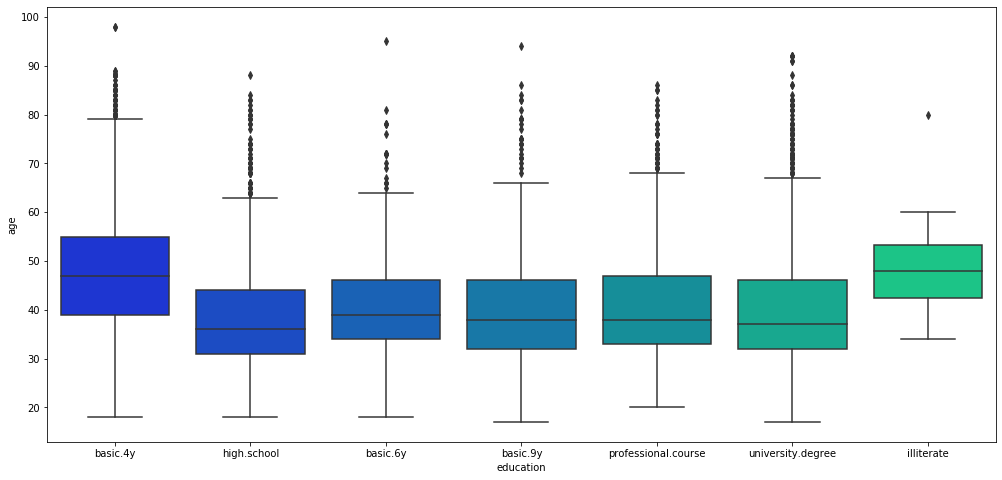

In [62]:
plt.figure(figsize=(17, 8))
sns.boxplot(x = 'education',y = 'age',data = bank, palette = 'winter')

## Default, Housing And Loan

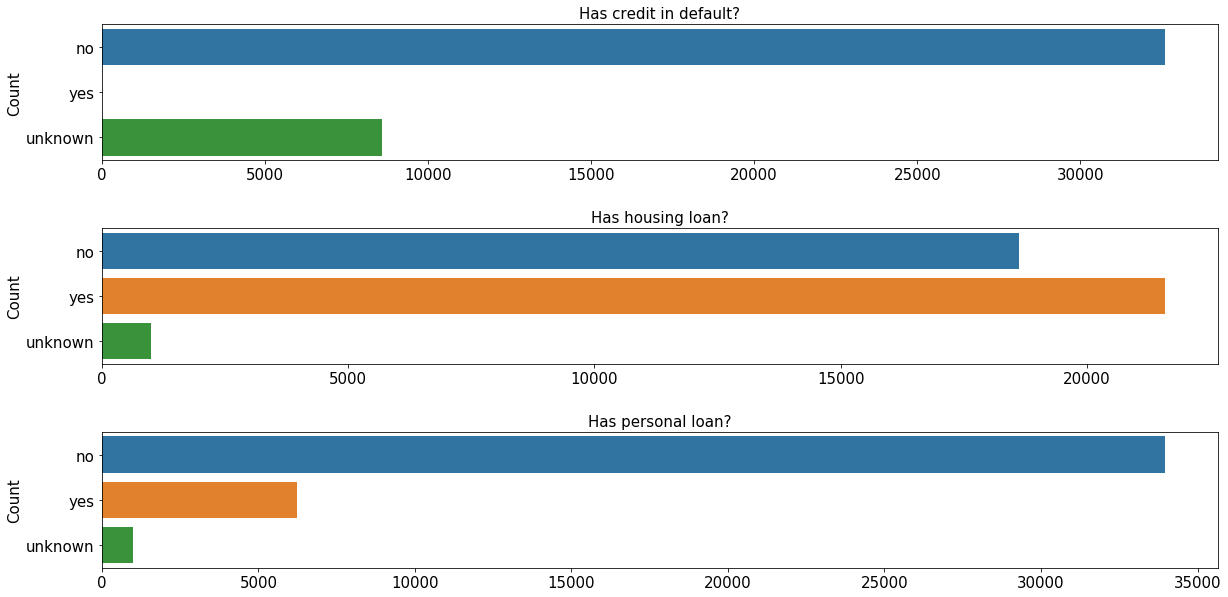

In [63]:
# Default distribution

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20,10))
sns.countplot(y = 'default', data = bank, ax = ax1, order = ['no', 'yes', 'unknown'])
ax1.set_title('Has credit in default?', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing distribution

sns.countplot(y = 'housing', data = bank, ax = ax2, order = ['no', 'yes', 'unknown'])
ax2.set_title('Has housing loan?', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan distribution

sns.countplot(y = 'loan', data = bank, ax = ax3, order = ['no', 'yes', 'unknown'])
ax3.set_title('Has personal loan?', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(hspace=0.5)

kalau dilihat dari chart diatas, di feature default seperti tidak ada client yg mempunyai credit di default
kita bisa tau pastinya berapa countnya kalo kita liat value countnya masing" feature dibawah

In [64]:
DHL = ["default", "housing", "loan"]

default_count = []
housing_count = []
loan_count = []

for k in bank[DHL]:
    if k == "default":
        default_count.append(len(bank[bank[k] == 'no']))
        default_count.append(len(bank[bank[k] == 'yes']))
        default_count.append(len(bank[bank[k] == 'unknown']))
        
    elif k == "housing":
        housing_count.append(len(bank[bank[k] == 'no']))
        housing_count.append(len(bank[bank[k] == 'yes']))
        housing_count.append(len(bank[bank[k] == 'unknown']))
    
    else:
        loan_count.append(len(bank[bank[k] == 'no']))
        loan_count.append(len(bank[bank[k] == 'yes']))
        loan_count.append(len(bank[bank[k] == 'unknown']))

pd.DataFrame({'Default' : default_count,
              'Housing' : housing_count,
              'Loan' : loan_count}, index = ["no", "yes", "unknown"])



,Default,Housing,Loan
no,32588,18622,33950
yes,3,21576,6248
unknown,8597,990,990


Di Feature Default, ada category unknown yg jumlahnya lumayan banyak tapi tidak perlu di buang karena memang mungkin client bank memilih utk membiarkan menjadi unknown.

### Correlation with target

In [65]:
default_cramers = []
housing_cramers = []
loan_cramers = []

for col in catcol:
        default_cramers.append(cramers_v(bank["default"],bank[col]))
        housing_cramers.append(cramers_v(bank["housing"],bank[col]))
        loan_cramers.append(cramers_v(bank["loan"],bank[col]))
        
pd.DataFrame({"CramersV_default" : default_cramers,
             "CramersV_housing" : housing_cramers,
             "CramersV_loan" : loan_cramers}, index = catcol).loc[['y']]



,CramersV_default,CramersV_housing,CramersV_loan
y,0.099111,0.009458,0.0


1). Dikarenakan cramersV dari Features "housing", dan "loan" itu sangat mendekati 0 semua, yg artinya dia tidak terlalu berpengaruh terhadap target kita, maka saya rasa sya boleh membuang dua features ini, tetapi kalau dilihat dari korelasi antara features sendiri, hanya Features "housing" dan "loan" yang mempunya korelasi yg tinggi antar satu dan yang lain. Ini lumayan masuk akal karena housing loan dan personal loan itu memang bisa mempengaruhi satu sama yang lain (contoh: jika personal loan dari client sendiri digunakan sebagai deposit utk housing loan client itu, karena dua features ini termasuk liability untuk si client). Jadi memungkinan adanya multicorrelation di data kita nantiny.

2). Jadi saya membuat keputusan utk hanya membuang Features "housing" dan "loan, tapi tetap mempertahankan Feature
Default sebagai tambahan saja.

3). Dari research saya, Default itu artinya "is the failure to repay a debt including interest or principal on a loan or security. A default can occur when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments".(Source : https://www.investopedia.com/terms/d/default2.asp#:~:text=What%20Is%20Default%3F,avoids%20or%20stops%20making%20payments.) jadi seharusnya Default ini bisa jadi 1 bahan pertimbangan utk bank utk melihat record credit scoring client tersebut. Apakah client ini dengan credit scoring yang sedemekian, masih bisa jadi potential client kita?

In [66]:
bank.drop(["housing", "loan"], inplace = True, axis = 1)

In [67]:
print(bank.columns)
len(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


18

## Age and Default

Text(0.5, 1.0, 'Age and Default')

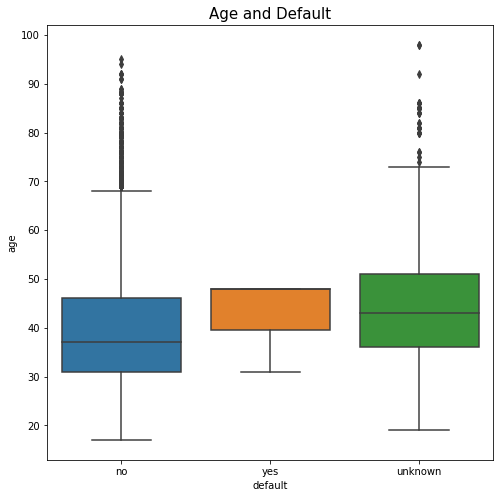

In [68]:
# Age and Default

figure(figsize = (8,8))
sns.boxplot(x = 'default', y = 'age', data = bank, order = ['no', 'yes', 'unknown'])
plt.title('Age and Default', fontsize=15)


Dikarenakan kebanyakan client bank rata" umurnya di range 30 - 50, skitar 50% dari data client utk feature
default terdapat di range client yg umurnya 30 - 50


In [69]:
bank[bank["default"] == "yes"]["age"].describe()

# kita bisa melihat bahwa Q2, Q3, dan max default adalah angka yg sama 
# oleh karena itu, di boxplot diatas kita bisa melihat bahwa tidak ada upper whisker, karena menyatu dengan Q3 dan tidak ada
# garis di tengah 

count     3.000000
mean     42.333333
std       9.814955
min      31.000000
25%      39.500000
50%      48.000000
75%      48.000000
max      48.000000
Name: age, dtype: float64

In [70]:
mediumage = len(bank[(bank["age"] >= 30) & (bank["age"] <= 50)])

In [71]:
mediumage / len(bank) * 100

68.80402058852093

In [72]:
new_catcol = bank.select_dtypes(exclude = np.number).columns
print(new_catcol.unique())
len(new_catcol.unique())

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')


9

## BANK CLIENTS CONCLUSION

1). Bisa kita melihat bahwa rata" client yg umurnya range dari 30 - 50 memenuhi sebanyak 68% dari
total dataset, jadi client" ini lumayan mempengaruhi dataset ini

2). Kita sudah menghilangkan Features "housing" dan "loan", karena di-asumsikan tidak akan memberi efek ke target kita

3). Sisa Features disini adalah "age", "job", "marital", "education", dan "default"

## Related with the last contact of the current campaign  

In [73]:
related_data = ["contact", "month", "day_of_week"]

for i in related_data:
    if i == "contact":
        print("unique value in contact column =  {}".format(bank[i].unique()))
    elif i == "month":
        print("unique value in month column = {}".format(bank[i].unique()))
    else:
        print("unique value in day_of_week column = {}".format(bank[i].unique()))



unique value in contact column =  ['telephone' 'cellular']
unique value in month column = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
unique value in day_of_week column = ['mon' 'tue' 'wed' 'thu' 'fri']


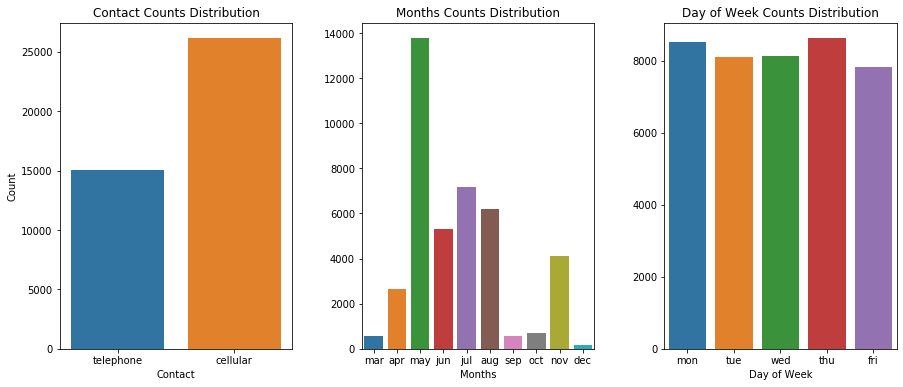

In [74]:
# Distribution Plot

fig, (ax7, ax8, ax9) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))

# CONTACT
sns.countplot(bank["contact"], ax = ax7)
ax7.set_xlabel("Contact", fontsize = 10)
ax7.set_ylabel("Count", fontsize = 10)
ax7.set_title("Contact Counts Distribution")
ax7.tick_params(labelsize=10)


# MONTH
sns.countplot(bank["month"], ax = ax8, order = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
ax8.set_xlabel("Months", fontsize = 10)
ax8.set_ylabel("")
ax8.set_title("Months Counts Distribution")
ax8.tick_params(labelsize=10)

# DAY OF WEEK
sns.countplot(bank["day_of_week"], ax = ax9)
ax9.set_xlabel("Day of Week", fontsize = 10)
ax9.set_ylabel("")
ax9.set_title("Day of Week Counts Distribution")
ax9.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.3)

1). Utk Contact Counts Distribution, lebih banyak ketika Bank meng-kontak client dengan menggunakan cellular

2). Utk Months Counts Distribution, bank meng-kontak client pada periode bulan april sampai agustus dan lanjut
lagi bulan november

3). Utk Day of Week Counts Distribution, frequency bank meng-kontak pada hari kerja semua sama saja, tidak ada yg beda

## Contact

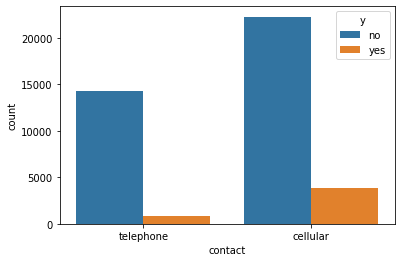

In [75]:
sns.countplot(bank["contact"], hue = bank["y"])

In [76]:
open_depo(bank, "contact")

,Open_deposit,Open_deposit_percent
cellular,3853,14.737607
telephone,787,5.231321


## Months

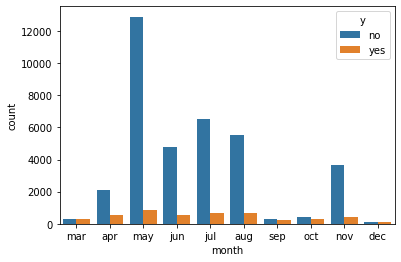

In [77]:
sns.countplot(bank["month"], hue = bank["y"], order = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])

Periode paling sering bank dalam meng-kontak client adalah dari bulan April - Agustus lalu bulan November saja

Bulan May adalah periode dimana bank paling sering melakukan pengontakan terhadap client

menurut article yg saya baca (Source : https://juliedawnfox.com/best-time-to-visit-portugal/#spring)

Portugal merupakan negara yang banyak acara festival dan libur nasional

Ini season periode di Portugal:

    1). Spring in Portugal (March to May)
    2). Summer in Portugal (June to mid September)
    3). Autumn in Portugal (mid September to December)
    4). Winter in Portugal (December to February)

Bulan May merupakan salah satu bulan yang paling popular alias ramai, ini adalah bulan berziarah orang portugal (e.g 
Portuguese Camino de Santiago), mungkin bisa juga dikarenakan adanya hari berziarah atau adanya festival lainnya, orang" Portugal lebih cenderung utk spending dibandingkan investing uang.

Periode Spring dan Summer sepertinya mempunyai lebih banyak festival dan acara penting dibandingkan saat Autumn (kecuali November) dan Winter dimana keramaian mulai reda.

NOTE: kita bisa merekomendasikan bank, utk mengontak potential client bank saat periode sebelom mulai ramai acara
dan festival sperti dari mulainya Autumn sampai awal Spring, dimana orang tidak melakukan aktivitas banyak dan dapat lebih fokus utk memikirkan investing atau mengelola keuangan mereka.

In [78]:
open_depo(bank, "month")

,Open_deposit,Open_deposit_percent
mar,276,50.549451
dec,89,48.901099
sep,256,44.912281
oct,315,43.871866
apr,539,20.478723
aug,655,10.602137
jun,559,10.511470
nov,416,10.143867
jul,649,9.046557
may,886,6.434745


Dari analisa diatas, kita bisa melihat bahwa ada ketidak tepatan di strategy timing marketing campaign, 
seperti tidak perlu melakukan pengontakan yg berlebihan dari periode April - Agustus dan November, karena client" pada 
periode ini cenderung utk tidak membuka term deposit, jadi hasilnya tidak selaras, 
dimana utk melakukan pengontakan yang berlebihan seperti ini tentu bank harus mengeluarkan sedemikian besar budget utk 
dialokasikan utk marketing campaign

NOTE: kita bisa merekomendasikan bank, utk mengeja ulang strategy timing utk marketing campaign, utk lebih menfokuskan 
    pengontakan pada bulan maret, september, october dan december, yg dimana persentase utk client membuka term deposit masih
    lumayan tinggi (> 40%). Ini bisa dibilang menjadi salah satu strategy utk menerapkan cost efektif pada budget marketing
    campaign bank.


## Day of Week

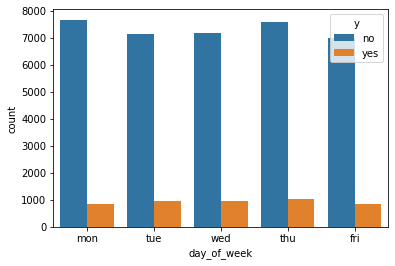

In [79]:
sns.countplot(bank["day_of_week"], hue = bank["y"])

In [80]:
open_depo(bank, "day_of_week")

,Open_deposit,Open_deposit_percent
thu,1045,12.118752
tue,953,11.779975
wed,949,11.667076
fri,846,10.808739
mon,847,9.948320


### Correlation with target

In [81]:
contact_cramers = []
month_cramers = []
day_cramers = []

for col in new_catcol:
        contact_cramers.append(cramers_v(bank["contact"],bank[col]))
        month_cramers.append(cramers_v(bank["month"],bank[col]))
        day_cramers.append(cramers_v(bank["day_of_week"],bank[col]))
        
pd.DataFrame({"CramersV_contact" : contact_cramers,
             "CramersV_month" : month_cramers,
             "CramersV_day" : day_cramers}, index = new_catcol).loc[['y']]


,CramersV_contact,CramersV_month,CramersV_day
y,0.144611,0.274,0.023188


1). Disini pertama" Feature "month" emang kalau dilihat dari data diatas, ada kemungkinan dapat mempengaruhi target kita 
(contoh: seasonal holidays atau bukan)

2). Saya masih kurang mengerti apa efek jelas dari cara bank mengkontak client (i.e lewat celular atau telpon), tapi
akan saya tetep keep datanya utk modelling

3). Menurut Saya, Features day_of_week ini tidak terlalu mempengaruhi kinerja model kita, karena datanya seperti constant,
dan mirip semua jadi boleh saya asumsikan utk di buang

In [82]:
bank = bank.drop('day_of_week', axis = 1)

In [83]:
print(bank.columns)
len(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


17

In [84]:
new_catcol = bank.select_dtypes(exclude = np.number).columns
print(new_catcol.unique())
len(new_catcol.unique())

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')


8

## Other Attributes

In [85]:
other_attributes = ["campaign", "pdays", "previous", "poutcome"]

for i in other_attributes:
    if i == "campaign":
        print("unique value in campaign column =  {}".format(bank[i].unique()))
    elif i == "pdays":
        print("unique value in pdays column = {}".format(bank[i].unique()))
    elif i == "previous":
        print(("unique value in previous column = {}".format(bank[i].unique())))
    else:
        print("unique value in poutcome column = {}".format(bank[i].unique()))


unique value in campaign column =  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
unique value in pdays column = [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
unique value in previous column = [0 1 2 3 4 5 6 7]
unique value in poutcome column = ['nonexistent' 'failure' 'success']


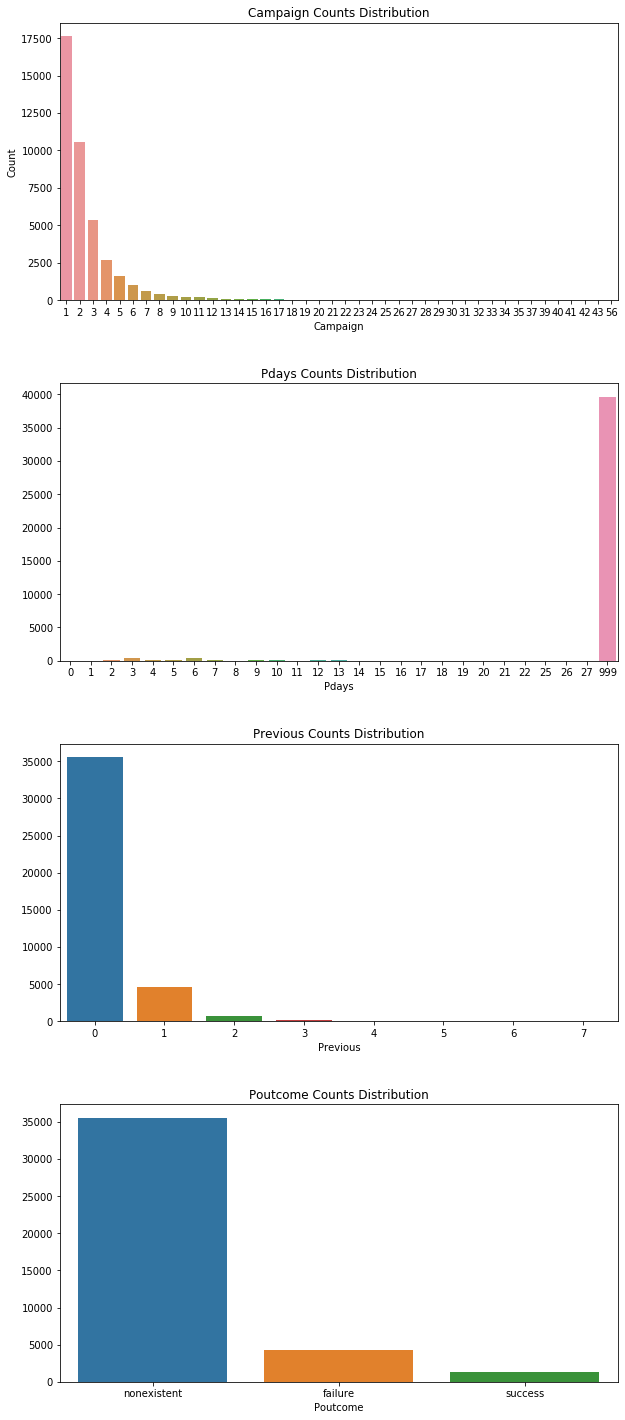

In [86]:
## Distribution Plot

fig, (ax10, ax11, ax12, ax13) = plt.subplots(nrows = 4, ncols = 1, figsize = (10,25))

# CAMPAIGN
sns.countplot(bank["campaign"], ax = ax10)
ax10.set_xlabel("Campaign", fontsize = 10)
ax10.set_ylabel("Count", fontsize = 10)
ax10.set_title("Campaign Counts Distribution")
ax10.tick_params(labelsize=10)

# PDAYS
sns.countplot(bank["pdays"], ax = ax11)
ax11.set_xlabel("Pdays", fontsize = 10)
ax11.set_ylabel("")
ax11.set_title("Pdays Counts Distribution")
ax11.tick_params(labelsize=10)

# PREVIOUS
sns.countplot(bank["previous"], ax = ax12)
ax12.set_xlabel("Previous", fontsize = 10)
ax12.set_ylabel("")
ax12.set_title("Previous Counts Distribution")
ax12.tick_params(labelsize=10)

# POUTCOME
sns.countplot(bank["poutcome"], ax = ax13)
ax13.set_xlabel("Poutcome", fontsize = 10)
ax13.set_ylabel("")
ax13.set_title("Poutcome Counts Distribution")
ax13.tick_params(labelsize=10)

plt.subplots_adjust(hspace=0.3)

1). Feature pdays adalah banyaknya hari yang terlewat setelah kampanye terakhir dilakukan. Sedangkan untuk feature poutcome adalah menunjukkan hasil nasabah dari tawaran kampanye sebelumnya.

2). Utk pdays, sesuai dengan pernyataan di description variables diatas (999 means client was not previously contacted), kita bisa juga kaitkan ini dengan column poutcome, utk mencari tau insight apa yang bisa diambil

3). utk poutcome, data yg nonexistent mendominasi column ini, maka begitu saya tetep akan keep value ini,
walaupun msh tidak jelas maksud datanya itu apa

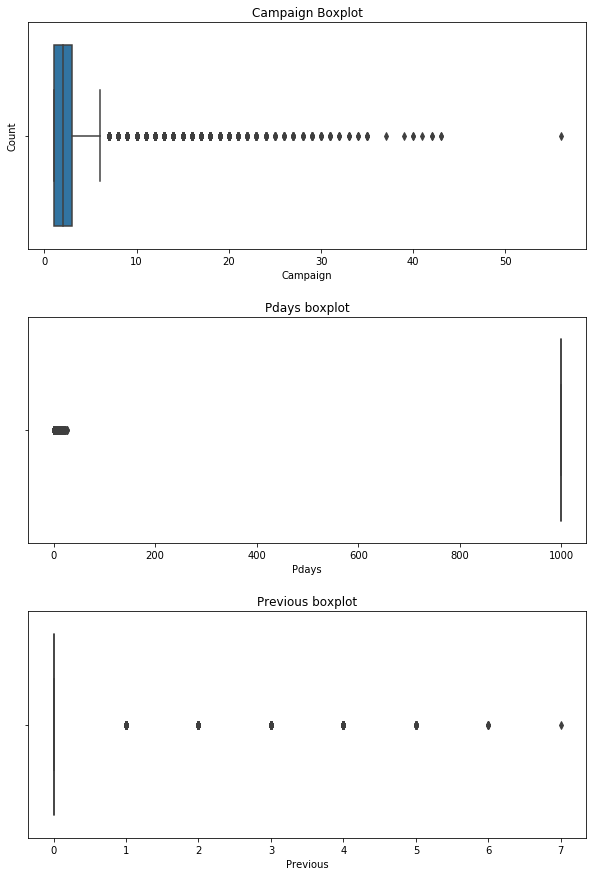

In [87]:
## Boxplot

fig, (ax14, ax15, ax16) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,15))

# CAMPAIGN
sns.boxplot(bank["campaign"], ax = ax14)
ax14.set_xlabel("Campaign", fontsize = 10)
ax14.set_ylabel("Count", fontsize = 10)
ax14.set_title("Campaign Boxplot")
ax14.tick_params(labelsize=10)

# PDAYS
sns.boxplot(bank["pdays"], ax = ax15)
ax15.set_xlabel("Pdays", fontsize = 10)
ax15.set_ylabel("")
ax15.set_title("Pdays boxplot")
ax15.tick_params(labelsize=10)

# PREVIOUS
sns.boxplot(bank["previous"], ax = ax16)
ax16.set_xlabel("Previous", fontsize = 10)
ax16.set_ylabel("")
ax16.set_title("Previous boxplot")
ax16.tick_params(labelsize=10)

plt.subplots_adjust(hspace=0.3)

1). Utk campaign, kebanyakan client di telpon oleh bank kurang dari 5 kali saja, tapi kita bisa melihat outliers juga
yang dimana ada client" yang ditelpon puluhan kali sampai ada yang 50 kali lebih, alasannya disini masih kurang jelas
untuk saya menarik insight dari data ini, jadi saya keep dulu aja

### Campaign

In [88]:
open_depo(bank, "campaign")

,Open_deposit,Open_deposit_percent
1,2300,13.037071
2,1211,11.456954
3,574,10.747051
4,249,9.392682
6,75,7.660878
5,120,7.504690
17,4,6.896552
11,12,6.779661
23,1,6.250000
7,38,6.041335


NOTE: 
kita bisa merekomendasikan ke bank, maksimal pengontakan ke client sampai 10 kali saja, karena menurut data, 
   terlalu banyak mengontak ke client, tidak membuahkan hasil yg sepadan. Jadi utk menghemat waktu dan biaya sebaiknya
    sampai 10 kali saja.

### Previous

In [89]:
prev_corr = []

for col in new_catcol:
    prev_corr.append(correlation_ratio(bank[col],bank["previous"]))

pd.DataFrame({"Previous_corr" : prev_corr}, index = new_catcol).sort_values(ascending = False, by = "Previous_corr")

,Previous_corr
poutcome,0.888135
month,0.280649
y,0.230181
contact,0.212848
job,0.135145
default,0.102630
marital,0.049123
education,0.047937


In [90]:
prev_corr = []
pout_cramers = []

for col in new_catcol:
        prev_corr.append(correlation_ratio(bank[col],bank["previous"]))
        pout_cramers.append(cramers_v(bank["poutcome"],bank[col]))
        
pd.DataFrame({"Corr_previous" : prev_corr,
             "CramersV_poutcome" : pout_cramers,
}, index = new_catcol).loc[['y']]


,Corr_previous,CramersV_poutcome
y,0.230181,0.320416


Features "previous" dan "poutcome" memiliki korelasi satu sama yg lain yg tinggi, maka saya akan membuang salah satu
yaitu Feature "previous".

In [91]:
bank.drop("previous", axis = 1, inplace = True,)
print(bank.columns)
len(bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


16

## PDAYS AND POUTCOME

In [92]:
pd.crosstab(bank['pdays'], bank['poutcome'])


poutcome,failure,nonexistent,success
pdays,,,
0,0,0,15
1,0,0,26
2,0,0,61
3,4,0,435
4,2,0,116
5,4,0,42
6,25,0,387
7,15,0,45
8,6,0,12


Disini kita bisa mensimpulkan korelasi antar Features "pdays" dan "poutcome", dimana value 999 di "pdays" yg artinya
orang ini tidak pernah di contact bank, dan alasannya mungkin kita bsa relate ke "poutcome". Dimana kemungkinan orang ini 
gagal utk di contact oleh bank, atau emang belom pernah di contact.

In [93]:
pdays_corr = []
pout_cramers = []

for col in new_catcol:
        pdays_corr.append(correlation_ratio(bank[col],bank["pdays"]))
        pout_cramers.append(cramers_v(bank["poutcome"],bank[col]))
        
pd.DataFrame({"Corr_pdays" : pdays_corr,
             "CramersV_poutcome" : pout_cramers,
}, index = new_catcol).loc[['y']]


,Corr_pdays,CramersV_poutcome
y,0.324914,0.320416


In [94]:
new_catcol

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'poutcome', 'y'],
      dtype='object')

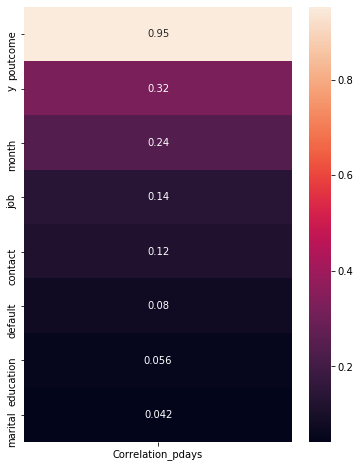

In [95]:
corr_pdays = []
for col in new_catcol:
    corr_pdays.append(correlation_ratio(bank[col],bank["pdays"]))

plt.figure(figsize = (6,8))
sns.heatmap(pd.DataFrame({'Correlation_pdays' : corr_pdays}, index = new_catcol).sort_values(ascending = False, by = 'Correlation_pdays'), annot = True)

Features "pdays" dan "previous" itu sepertinya mempunyai insight ke hal yang sama (i.e mengenai informasi tentang apakah client ini baru atau bukan?), correlationnya jga tinggi sekali, pengaruh ke
target juga mirip.

Maka saya memutuskan utk mendrop salah satu yaitu "pdays", karena menurut saya "poutcome" bisa lebih memberikan informasi yg relevant terhadap model dari pada "pdays", karena hasil dari "pdays" pun, kita bisa wakilkan dengan 
"poutcome" (contoh: 999 di pdays, itu sama dengan result failure atau nonexistent di "poutcome")

In [96]:
bank.drop("pdays", axis = 1, inplace = True,)
print(bank.columns)
len(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


15

In [97]:
open_depo(bank, "poutcome")

,Open_deposit,Open_deposit_percent
success,894,65.112891
failure,605,14.228598
nonexistent,3141,8.832213


## Social and economic context attributes

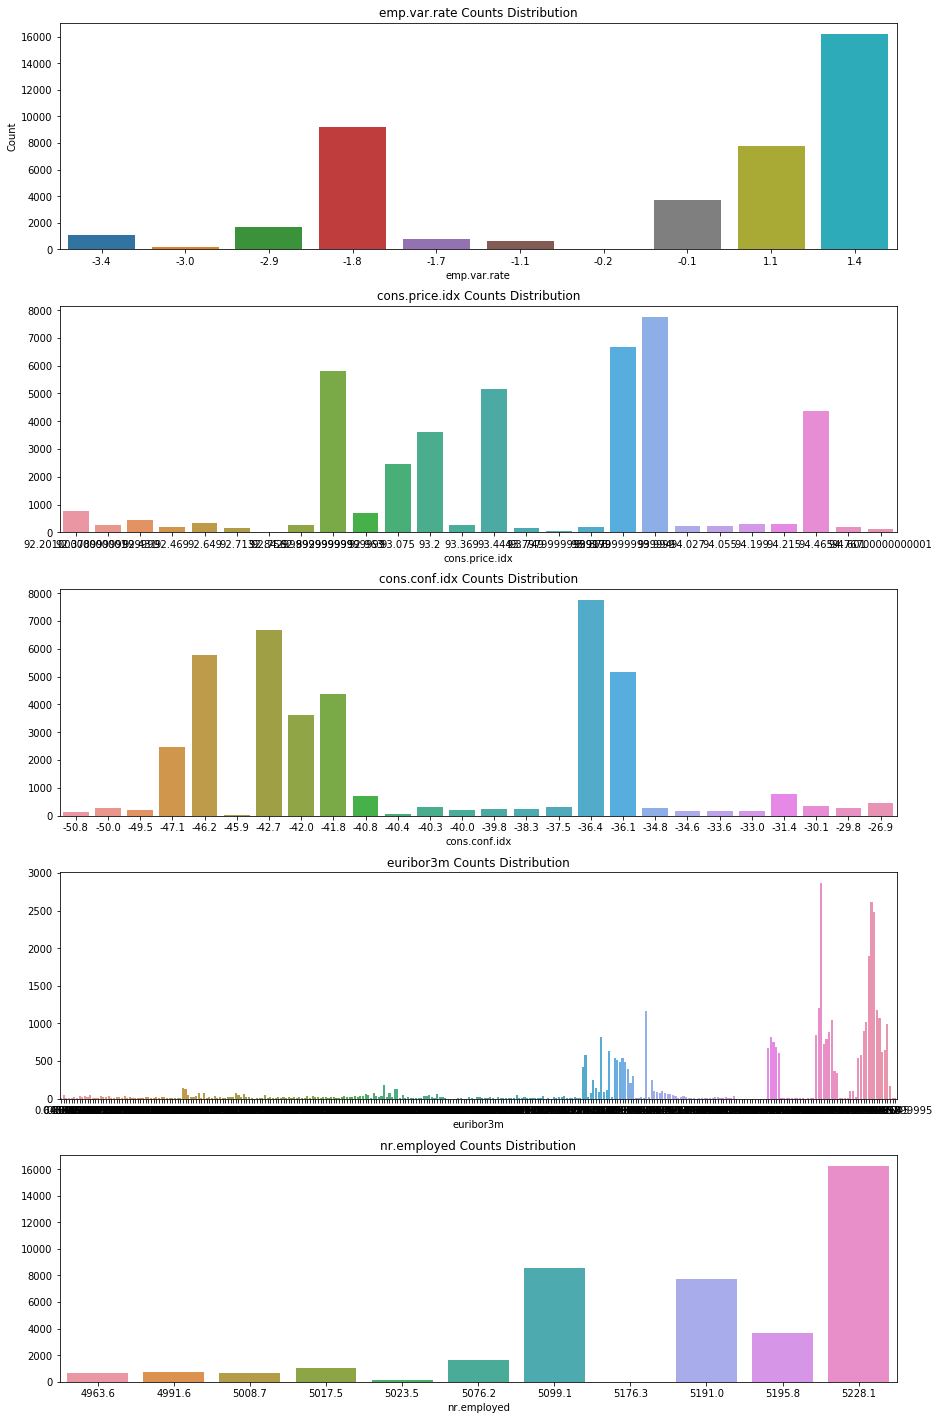

In [98]:
## Distribution Plot

fig, (ax17, ax18, ax19, ax20, ax21) = plt.subplots(nrows = 5, ncols = 1, figsize = (15,25))

# EMP.VAR.RATE
sns.countplot(bank["emp.var.rate"], ax = ax17)
ax17.set_xlabel("emp.var.rate", fontsize = 10)
ax17.set_ylabel("Count", fontsize = 10)
ax17.set_title("emp.var.rate Counts Distribution")
ax17.tick_params(labelsize=10)

# CONS.PRICE.IDX
sns.countplot(bank["cons.price.idx"], ax = ax18)
ax18.set_xlabel("cons.price.idx", fontsize = 10)
ax18.set_ylabel("")
ax18.set_title("cons.price.idx Counts Distribution")
ax18.tick_params(labelsize=10)

# CONS.CONF.IDX
sns.countplot(bank["cons.conf.idx"], ax = ax19)
ax19.set_xlabel("cons.conf.idx", fontsize = 10)
ax19.set_ylabel("")
ax19.set_title("cons.conf.idx Counts Distribution")
ax19.tick_params(labelsize=10)

# EURIBOR3M
sns.countplot(bank["euribor3m"], ax = ax20)
ax20.set_xlabel("euribor3m", fontsize = 10)
ax20.set_ylabel("")
ax20.set_title("euribor3m Counts Distribution")
ax20.tick_params(labelsize=10)

# NR.EMPLOYED
sns.countplot(bank["nr.employed"], ax = ax21)
ax21.set_xlabel("nr.employed", fontsize = 10)
ax21.set_ylabel("")
ax21.set_title("nr.employed Counts Distribution")
ax21.tick_params(labelsize=10)

plt.subplots_adjust(hspace=0.25)

Correlation antara Social & Economic context attributes

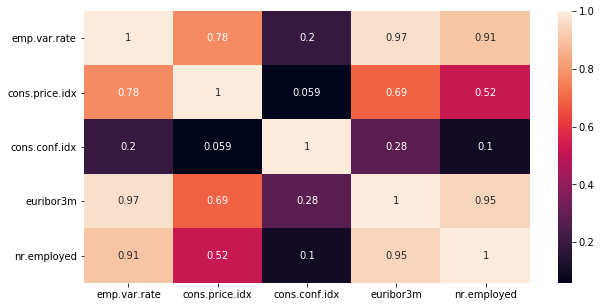

In [99]:
plt.figure(figsize = (10,5))
sns.heatmap(bank[["emp.var.rate", "cons.price.idx" , "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True)

Di dalam Social & Economic content attribute, terdapat 4 Features yang mempunya correlation yg tinggi antara satu sama yang lain.
Features ini adalah "cons.price.idx", "euribor3m", "nr.employed", "emp.var.rate".

In [100]:
emp_var_rate_corr = []
cons_price_corr = []
cons_conf_corr = []
euri_corr = []
nr_emp_corr = []


for col in new_catcol:
        emp_var_rate_corr.append(correlation_ratio(bank[col],bank["emp.var.rate"]))
        cons_price_corr.append(correlation_ratio(bank[col],bank["cons.price.idx"]))
        cons_conf_corr.append(correlation_ratio(bank[col],bank["cons.conf.idx"]))
        euri_corr.append(correlation_ratio(bank[col],bank["euribor3m"]))
        nr_emp_corr.append(correlation_ratio(bank[col],bank["nr.employed"]))

        
pd.DataFrame({"Corr_emp.var.rate" : emp_var_rate_corr,
             "Corr_conf.price.idx" : cons_price_corr,
              "Corr_conf.conf.idx" : cons_conf_corr,
              "Corr_euribor3m" : euri_corr,
              "Corr_nr.employed" : nr_emp_corr
}, index = new_catcol).loc[['y']]


,Corr_emp.var.rate,Corr_conf.price.idx,Corr_conf.conf.idx,Corr_euribor3m,Corr_nr.employed
y,0.298334,0.136211,0.054878,0.307771,0.354678


## EMP.VAR.RATE

Saya tidak tau arti yang pasti mengenai employment variation rate, cman dari research yg saya dapet, bisa ada kaitannya dengan cyclical employment variation. 

"Cyclical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. When the economy is in a recession or depression, people should be more conservative with their money and how they spend it because their financial future is less clear due to cyclical unemployment. When the economy is at its peak, individuals can be more open to risky investments because their employment options are greater." (Source: https://www.quora.com/What-is-meant-by-employment-variation-rate-Does-it-affect-in-any-way-the-financial-decisions-that-an-individual-takes)

Dan ini ada sedikit reference juga mengenai gambaran tentang kondisi employment rate di Portugal (Source: https://tradingeconomics.com/portugal/employment-rate)

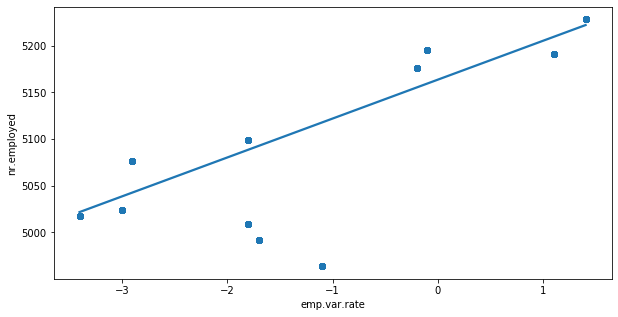

In [101]:
fig = plt.figure(figsize = (10,5))
sns.regplot(bank["emp.var.rate"], bank["nr.employed"])

Dikarenakan Features "emp.var.rate" dan "nr.employed" memiliki informasi yang mutual yaitu seputar employment maka kita bisa korelasikan.

Kita bisa melihat correlation antara Features "emp.var.rate" dengan "nr.employed",
mereka berbanding lurus (i.e ketika "emp.var.rate" naik, maka "nr.employed" juga ikut naik dan sebaliknya)

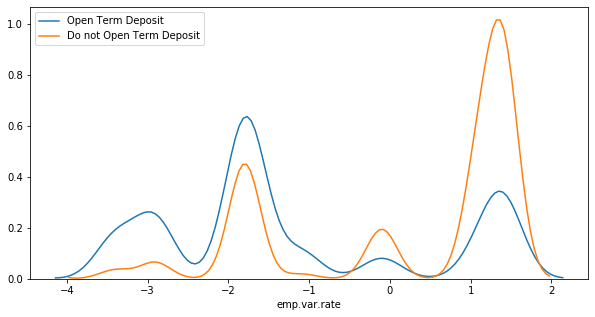

In [102]:
fig = plt.figure(figsize = (10,5))
sns.distplot(bank[bank["y"] == "yes"]["emp.var.rate"], hist = False, label = "Open Term Deposit")
sns.distplot(bank[bank["y"] == "no"]["emp.var.rate"], hist = False, label = "Do not Open Term Deposit")

Client bank terlihat lebih memiliki potensi utk men-subscribed Term deposit, jika keadaan employment variation rate sedang
berada di bawah 0 atau minus, dibandingkan ketika employment variation rate diatas 0 atau positive.

## NR.EMPLOYED

Number of employed disini tidak terlalu jelas dasarnya, apakah dia mereferensikan akan number of employment di Negara Portugal 
atau number of employment di bank tsb.

Jadi saya mengambil asumsi bahwa ini menunjukan kenaikan atau penuruan terhadap number of employment secara keseluruhan.


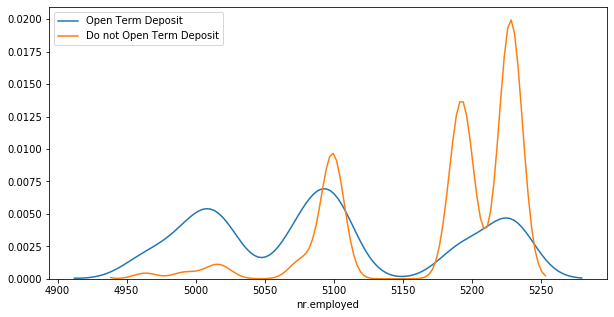

In [103]:
fig = plt.figure(figsize = (10,5))
sns.distplot(bank[bank["y"] == "yes"]["nr.employed"], hist = False, label = "Open Term Deposit")
sns.distplot(bank[bank["y"] == "no"]["nr.employed"], hist = False, label = "Do not Open Term Deposit")

Kalo dilihat dari chart distplot diatas, client bank lebih cenderung utk tidak men-subscribe Term Deposit ketika number of employees
sedang naik.

NOTE: kita bisa merekomendasikan bank, utk mencoba mengontak client ketika employment variation rate yang disini saya asumsikan sebagai cyclical employment variation di Portugal sedang dalam kondisi penurunan atau number of employment sedang rendah.

## CONS.CONF.IDX

Dari research saya, Consumer Confidence Index adalah suatu index yang diperoleh lewat survey, yang mengukur seberapa 
optimis atau pesimis seseorang dalam mengeluarkan uang dalam kondisi financial mereka di waktu sekarang atau di masa depan. Yang dimana akhirnya dapat kita bisa mendapatkan pattern, apakah negara tsb akan mengalami kenaikan dalam economy atau merujuk ke resesi.

"The Consumer Confidence Index is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation."

Source : https://www.investopedia.com/terms/c/cci.asp

Informasi tambahan mengenai CCI Portugal -> Source : https://tradingeconomics.com/portugal/consumer-confidence

CCI Portugal drop ke angka -26.3 di bulan September 2020

Rata" CCI Portugal ini berada di posisi Negatif dari tahun 1997 - 2019. Dengan All time high di tahun 1997 yaitu -0.145.
Source : https://www.ceicdata.com/en/portugal/consumer-confidence-indicator/consumer-confidence-indicator#:~:text=Portugal's%20Consumer%20Confidence%20Indicator%20data,Jan%202019%2C%20with%20257%20observations.

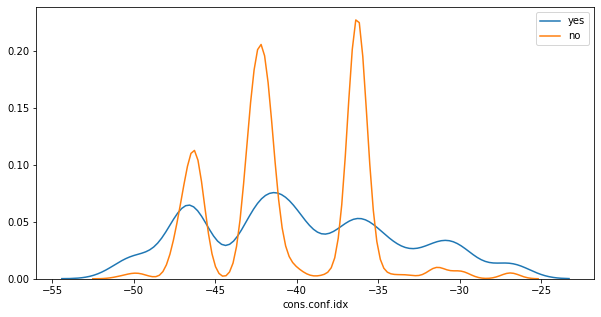

In [104]:
fig = plt.figure(figsize = (10,5))
sns.distplot(bank[bank["y"] == "yes"]["cons.conf.idx"], label = "yes", hist = False)
sns.distplot(bank[bank["y"] == "no"]["cons.conf.idx"], label = "no", hist = False)
plt.legend()

Kalau melihat diatas, banyak client yg mens-subscribe term deposit disaat index range dari -50 sampai -30.

Sebenarnya, Jika CCI sedang dalam down-trending keadaannya, consumer atau org akan lebih cenderung saving lebih banyak 
uang dari pada spending.

Jadi mungkin consumer sedang tidak berpikiran utk mengeluarkan utk apapun yg berlebihan, dikarenakan kondisi finansial yg sedang tidak bagus, jadi lebih menfokuskan utk menggunakan uang sehemat mungkin. 

Tetapi, di sisi lain bisa juga masuk akal utk meng-invest, ketika CCI sedang rendah, orang atau consumer lebih memutar otak 
utk memikirkan bagaimana cara agar uang di saving bisa bertambah dan menghambat spending berlebihan.

NOTE : Kita bisa merekomendasikan ke bank, utk membuat strategi marketing dengan mencocokan dengan situasi CCI terkini di Portugal.
     Jadi misal kalau utk sekarang (CCI = -26.3), lalu kemudian ada kemungkinan penurunan lagi, ada baiknya utk mulai mencoba mengontak client agar membuka term deposit.

## CONS.PRICE.IDX

Consumer Price Index (CPI) adalah pengukur perubahan harga atas sekelompok barang dan jasa yang dibeli oleh rumah tangga-rumah tangga (konsumen) dalam suatu negara, seperti tarif transportasi, harga makanan, dan biaya perawatan kesehatan. 

Consumer Price Index (CPI) merupakan salah satu agenda yang paling sering ditandai sebagai indikator ekonomi berdampak besar terhadap nilai mata uang

CPI sering juga digunakan untuk mengukur tingkat inflasi suatu negara dan juga sebagai pertimbangan untuk penyesuaian gaji, uang pensiun, dan kontrak lainnya.

Source : https://forexindonesia.org/kalenderforex/consumer-price-index-cpi.html

Consumer Price Index CPI di Portugal menurunan menjadi 103.20 points utk bulan Agustus 2020.
Source : https://tradingeconomics.com/portugal/consumer-price-index-cpi


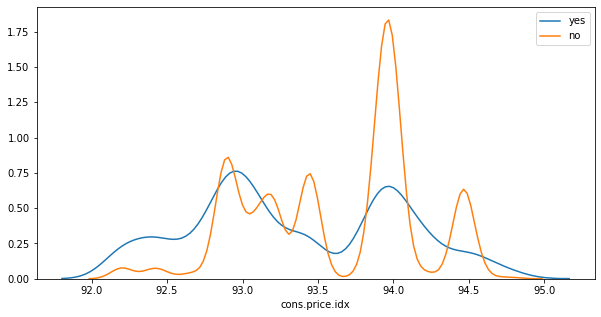

In [105]:
fig = plt.figure(figsize = (10,5))
sns.distplot(bank[bank["y"] == "yes"]["cons.price.idx"], label = "yes", hist = False)
sns.distplot(bank[bank["y"] == "no"]["cons.price.idx"], label = "no", hist = False)
plt.legend()

CPI bisa juga digunakan sebagai deflator utk indikator ekonomi lainnya seperti pendapatan per-minggu / per-jam di negara tsb. 

CPI juga berpengaruh terhadap inflasi, misal sedang naik indexnya, maka kemungkinan adanya inflasi, dimana rata" harga barang konsumen naik harganya, jadi purchasing power org menurun. Dan mungkin bukan waktu yg tepat utk membuka term deposit, karena lagi perlu memakai uang lebih utk membeli barang.

Jadi kebalikannya, kalo CPI sedang turun, maka inflasi jga turun, jadi secara finansial, orang akan lebih memiliki uang lebih yang bisa digunakan, atau utk di taruh di savings atau deposit.

Source : https://www.investopedia.com/terms/c/consumerpriceindex.asp
        
NOTE: Kita bisa merekomendasikan bank, utk mencocokan strategi marketing dengan CPI utk penerapan waktu kapan yang baik 
    utk mencoba mengontak client bank utk men-subscribe term deposit. Kalau menurut data di atas, saat CPI menurun adalah waktu yg boleh di coba utk mengontak client utk men-subcribe term deposit

### EURIBOR3M

Disini kita memakai euribor dengan 3 bulan maturity.

Ini beberapa research yg saya dapatkan:

Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the interest rates at which a panel of European banks borrow funds from one another. (seperti menaruh deposit antar bank)

The Euribor rates are important because these rates provide the basis for the price or interest rate of all kinds of financial products, like interest rate swaps, interest rate futures, saving accounts and mortgages.

Euribor ternyata mempunyai beberapa external faktor yang dapat memengaruhinya seperti inflasi dan pertumbuhan economi.
Ini bisa menjadi salah satu alasan utk menjelaskan korelasi euribor dengan CPI.

Source: https://www.euribor-rates.eu/en/what-is-euribor/

Last known euribor 3 month maturity : -0.509 % (05/10/2020)

Utk di Zona Eropa, Negative interest rates ini bisa dibilang digunakan utk men-stimulasi pertumbuhan ekonomi dan utk mengontrol inflasi di negara tsb. (contoh: adanya negative interest rates dapat mengurungkan niat investor utk membeli 
mata uang lokal negara tsb, yang kalau tidak bisa  

Source: https://www.bbc.com/news/business-32284393

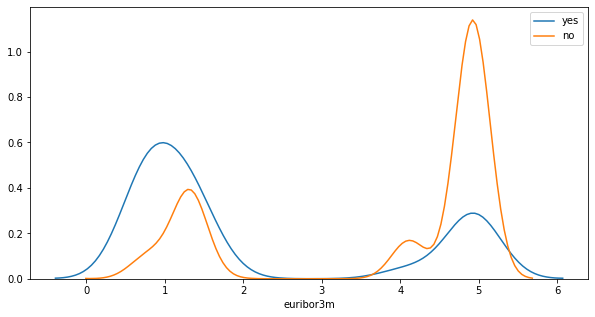

In [106]:
fig = plt.figure(figsize = (10,5))
sns.distplot(bank[bank["y"] == "yes"]["euribor3m"], label = "yes", hist = False)
sns.distplot(bank[bank["y"] == "no"]["euribor3m"], label = "no", hist = False)
plt.legend()

Disini kita bisa melihat bahwa jika euribor dibawah 3, lebih banyak client yang akan meng-subscribe term deposit dari pada
saat euribor sedang diatas 3.

Jadi mungkin jika euribor lagi rendah, inflasi akan menurun, maka keuangan orang" juga akan secara tidak langsung menaik, 
jadi mungkin mempunyai uang lebih yang dapat di taruh di savings mereka. Dan lebih menguntungkan utk membuka term deposit.
Walaupun euribor dapat juga mempengaruhi rate deposit. 

NOTE: Kita bisa merekomendasikan bank, utk membuat research utk mengetahui lebih dalam lagi efek euribor terhadap behaviour customer utk membuka term
    deposit, lalu mengkonfirmasi lagi apakah baik utk mengontak client saat euribor sedang rendah ratenya.

In [107]:
print(bank.columns)
len(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


15

In [108]:
bank_new = bank.copy()


In [109]:
bank_new.to_csv("bank_new.csv", index = False)


In [110]:
bank_new.head()

,age,job,marital,education,default,contact,month,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
